<h1>IME672 Group Project<h1>
<h3>problem description: predict price for flight tickets using data of Air Tickets Between Shanghai and Beijing<h3>

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import researchpy
df = pd.read_csv("pek-sha.csv")
df.head(10)

,ID,flightNumber,craftTypeCode,depAirport,traAirport,arrAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,createDate,dateDifference
0,14393,HO1252,320,PEK,NaN,SHA,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,2019-01-03 14:26:15,1
1,14409,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,2019-01-03 14:26:15,1
2,14415,MU5138,33L,PEK,NaN,SHA,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1
3,14429,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,2019-01-03 14:26:15,1
4,14431,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,2019-01-03 14:26:15,1
5,14433,HU7605,350,PEK,NaN,SHA,2019-01-04 07:20:00,2019-01-04 09:35:00,C,C,5660,1.00,2019-01-03 14:26:15,1
6,14445,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,R,1860,0.34,2019-01-03 14:26:15,1
7,14451,CA1831,773,PEK,NaN,SHA,2019-01-04 07:30:00,2019-01-04 09:35:00,C,J,5530,1.00,2019-01-03 14:26:15,1
8,14488,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,I,1800,0.34,2019-01-03 14:26:15,1
9,14491,MU5102,333,PEK,NaN,SHA,2019-01-04 08:00:00,2019-01-04 10:15:00,C,J,5360,1.00,2019-01-03 14:26:15,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300336 entries, 0 to 300335
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              300336 non-null  int64  
 1   flightNumber    300336 non-null  object 
 2   craftTypeCode   300336 non-null  object 
 3   depAirport      300336 non-null  object 
 4   traAirport      5749 non-null    object 
 5   arrAirport      300336 non-null  object 
 6   departureDate   300336 non-null  object 
 7   arrivalDate     300336 non-null  object 
 8   cabinClass      300336 non-null  object 
 9   priceClass      300336 non-null  object 
 10  price           300336 non-null  int64  
 11  rate            300336 non-null  float64
 12  createDate      300336 non-null  object 
 13  dateDifference  300336 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 32.1+ MB


In [7]:
# data of flights between beijing to shanghai 
# traAirport      5749 non-null    object ....|||5749 values???
# float64(1), int64(3), object(10) lotta categorical data. drop id,
# rate - discount rate
# cabinClass: Y = Econ Class, C = Business Class , F = First Class
# flightnumber - every other flight should be unique.
# craftTypeCode - ICAO aircraft type designators.
# depAirport, arrAirport - arrival & departure airport.
# traAirport - an airport where an aircraft has made a stopover, which was not specified in the Electronic ticket. if other than layover exists, then planes might have been changed.
# dunno what createdate means but,
# in a random sample diff between createdate &  departureDate = 2019-03-30 06:35:00 - 2019-02-28 11:35:19 = 30, which is dateDifference. so, inferring that createDate is the day of booking the flight.
df.describe()

,ID,price,rate,dateDifference
count,3.003360e+05,300336.000000,300336.000000,300336.000000
mean,3.785370e+07,2209.684696,0.764667,6.682762
std,2.320571e+07,1755.003424,0.251366,7.501340
min,1.438400e+04,235.000000,0.000000,1.000000
25%,1.770736e+07,1005.000000,0.530000,2.000000
50%,3.718240e+07,1490.000000,0.860000,5.000000
75%,5.705183e+07,2980.000000,1.000000,7.000000
max,8.016500e+07,6410.000000,1.000000,30.000000


In [8]:
df.traAirport = df.traAirport.fillna('None')
df['traAirport'].nunique()

2

<AxesSubplot:xlabel='traAirport', ylabel='count'>

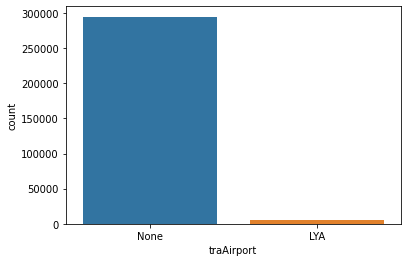

In [9]:
import seaborn as sns
sns.countplot(data=df,x="traAirport")

In [10]:
##there are only 2 values, either the flight didnt stop for a layover, or stoped at LYA(luoyang)
df["flightNumber"].nunique()

51

In [11]:
#51 unique values...hmmm.

In [12]:

df["craftTypeCode"].value_counts()

33L    59178
359    36896
333    31163
773    28022
325    16107
738    14067
321    11627
33A     9174
789     7915
747     7665
32L     7618
73E     7546
73L     7375
73K     6023
32A     5422
77W     5061
330     3995
350     3707
323     3405
338     3001
78A     2850
331     2806
33E     2796
744     2459
33G     2192
33H     1643
337     1613
320     1267
787     1144
78B     1106
332      925
73N      838
351      831
33W      613
336      473
319      381
73T      361
32M      350
33C      261
73B      251
73H      158
33B       42
73U        7
73G        2
Name: craftTypeCode, dtype: int64

In [13]:
df["craftTypeCode"].nunique()

44

<AxesSubplot:xlabel='price'>

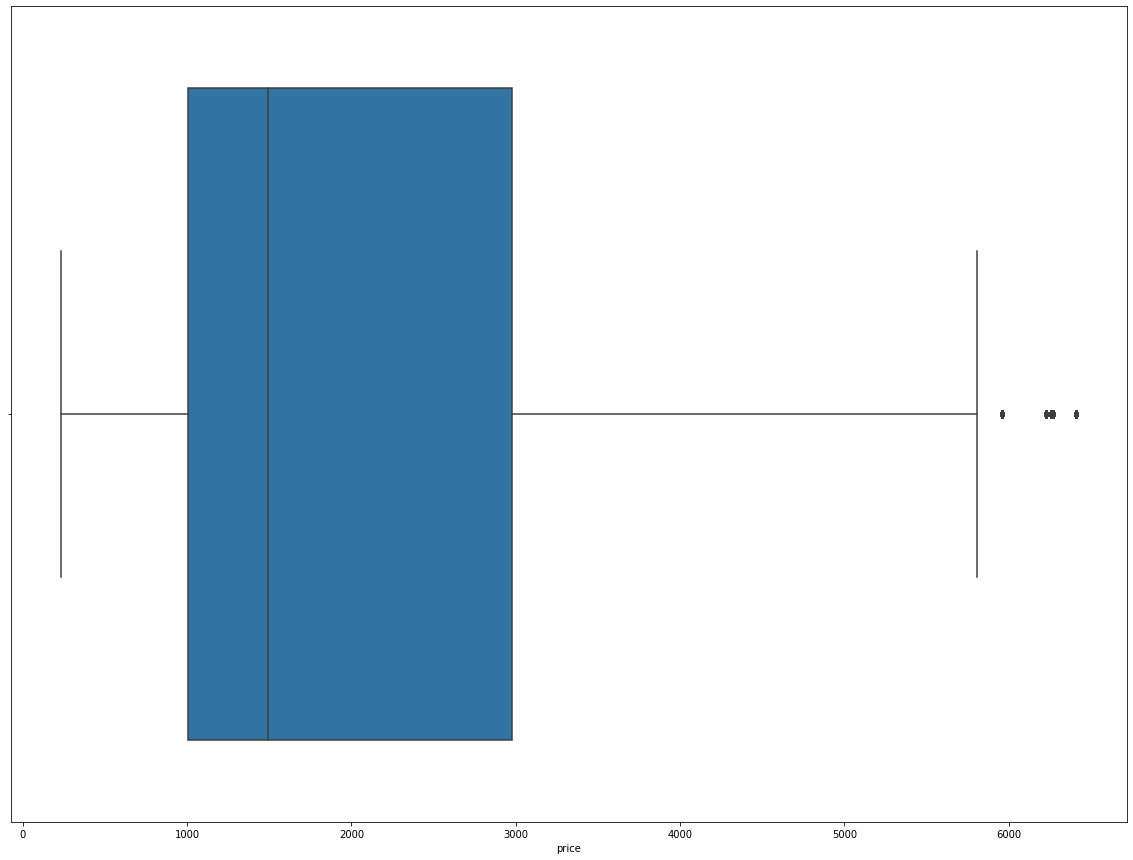

In [14]:
#checking for outliers in the data
fig, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(data=df,x='price')

In [15]:
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
IQR = q3 - q1
filter = (df['price'] >= q1 - 1.5 * IQR) & (df['price'] <= q3 + 1.5 *IQR)
df = df.loc[filter]
df.shape
print("Number of Outliers : 2205")

Number of Outliers : 2205


In [16]:
df[['arrivalDate','departureDate','createDate']] = df[['arrivalDate','departureDate','createDate']].apply(pd.to_datetime)
# departureDate should always be after createDate
df[df.departureDate < df.createDate].count()
#Hence no problem in this case

ID                0
flightNumber      0
craftTypeCode     0
depAirport        0
traAirport        0
arrAirport        0
departureDate     0
arrivalDate       0
cabinClass        0
priceClass        0
price             0
rate              0
createDate        0
dateDifference    0
dtype: int64

In [17]:
# arrivalDate should always be after departureDate
df[df.departureDate > df.arrivalDate].count()
#Hence no problem in this case

ID                0
flightNumber      0
craftTypeCode     0
depAirport        0
traAirport        0
arrAirport        0
departureDate     0
arrivalDate       0
cabinClass        0
priceClass        0
price             0
rate              0
createDate        0
dateDifference    0
dtype: int64

In [18]:
#checking for anamolies in depAirport & arrAirport, both shoould have only one value.
print(df["depAirport"].nunique(),df["arrAirport"].nunique())

1 1


In [19]:
#so drop depAirport arrAirport id traAirport since they are pretty much useless
#can also drop createDate since dateDifference also serves same purpose

In [20]:
df.drop(['ID','depAirport','arrAirport','createDate'], axis = 1, inplace=True)
df.head(10)

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1
5,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,C,5660,1.00,1
6,CA1831,773,None,2019-01-04 07:30:00,2019-01-04 09:35:00,C,R,1860,0.34,1
7,CA1831,773,None,2019-01-04 07:30:00,2019-01-04 09:35:00,C,J,5530,1.00,1
8,MU5102,333,None,2019-01-04 08:00:00,2019-01-04 10:15:00,C,I,1800,0.34,1
9,MU5102,333,None,2019-01-04 08:00:00,2019-01-04 10:15:00,C,J,5360,1.00,1


In [21]:
# can add an extra column for difference between departureDate & arrivalDate, that way we wont have to keep these 2 columns.
# as they are, it will tough for our model to infer from the datetime values
# or we could convert them to sin & cosine values of date & day(cyclic encoding),
# or we could simply extract the day of the flight, since flights on weekdays may be cheaper than weekends.

In [22]:
#df[['arrivalDate','departureDate',]] = df[['arrivalDate','departureDate',]].apply(pd.to_datetime)
df['daysaway'] = (df['arrivalDate'] - df['departureDate']).dt.days

In [23]:
df['depDay']=df['departureDate'].dt.day_name()
df['arrDay']=df['arrivalDate'].dt.day

In [24]:
df.head()

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1,0,Friday,4
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1,0,Friday,4
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1,0,Friday,4
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1,0,Friday,4
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1,0,Friday,4


In [25]:
print(df['daysaway'].nunique(),df["depDay"].nunique(),df["arrDay"].nunique())

1 7 31


In [26]:
#so, these are all one day trips, so counting days wont work. lets count seconds
df['daysaway'] = (df['arrivalDate'] - df['departureDate']).dt.seconds

In [27]:
df.head()

,flightNumber,craftTypeCode,traAirport,departureDate,arrivalDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,2019-01-04 08:55:00,C,C,1860,1.00,1,8400,Friday,4
1,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,I,1640,0.31,1,8100,Friday,4
2,MU5138,33L,None,2019-01-04 07:00:00,2019-01-04 09:15:00,C,J,5360,1.00,1,8100,Friday,4
3,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1635,0.29,1,8100,Friday,4
4,HU7605,350,None,2019-01-04 07:20:00,2019-01-04 09:35:00,C,I,1640,0.29,1,8100,Friday,4


In [28]:
#alright works

In [29]:
df.drop(['arrivalDate'], axis = 1, inplace=True)
df.head(10)

,flightNumber,craftTypeCode,traAirport,departureDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,depDay,arrDay
0,HO1252,320,None,2019-01-04 06:35:00,C,C,1860,1.00,1,8400,Friday,4
1,MU5138,33L,None,2019-01-04 07:00:00,C,I,1640,0.31,1,8100,Friday,4
2,MU5138,33L,None,2019-01-04 07:00:00,C,J,5360,1.00,1,8100,Friday,4
3,HU7605,350,None,2019-01-04 07:20:00,C,I,1635,0.29,1,8100,Friday,4
4,HU7605,350,None,2019-01-04 07:20:00,C,I,1640,0.29,1,8100,Friday,4
5,HU7605,350,None,2019-01-04 07:20:00,C,C,5660,1.00,1,8100,Friday,4
6,CA1831,773,None,2019-01-04 07:30:00,C,R,1860,0.34,1,7500,Friday,4
7,CA1831,773,None,2019-01-04 07:30:00,C,J,5530,1.00,1,7500,Friday,4
8,MU5102,333,None,2019-01-04 08:00:00,C,I,1800,0.34,1,8100,Friday,4
9,MU5102,333,None,2019-01-04 08:00:00,C,J,5360,1.00,1,8100,Friday,4


<AxesSubplot:ylabel='Density'>

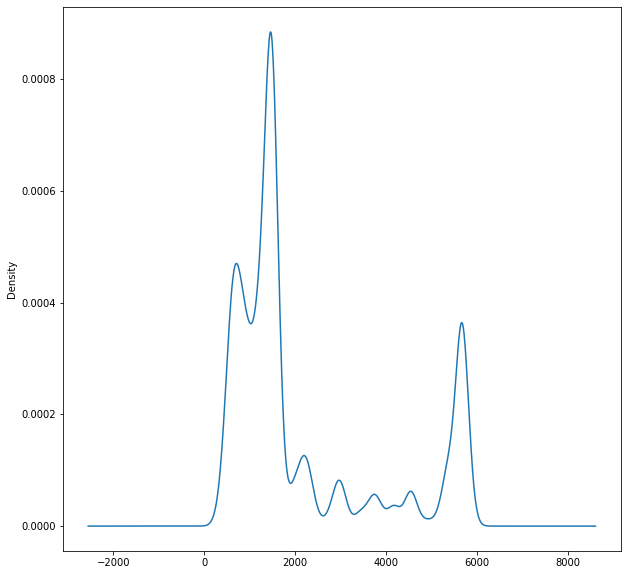

In [30]:
df["price"].plot(kind = "density" , figsize = (10,10))

<AxesSubplot:ylabel='Frequency'>

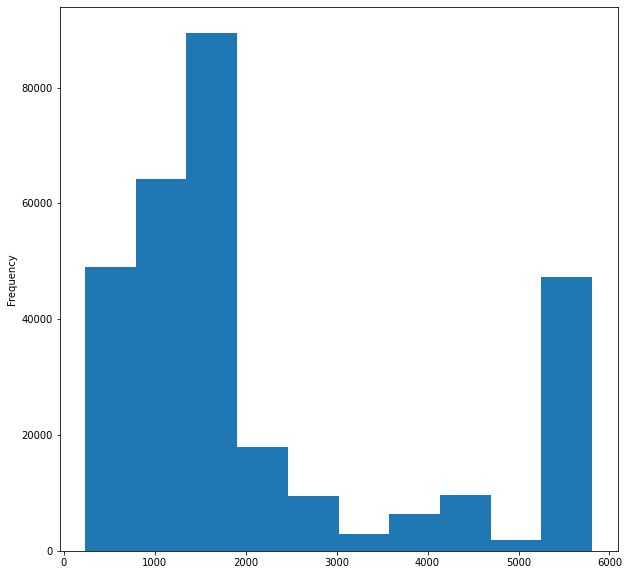

In [31]:
df["price"].plot(kind = "hist" , figsize = (10,10))

<AxesSubplot:xlabel='traAirport', ylabel='count'>

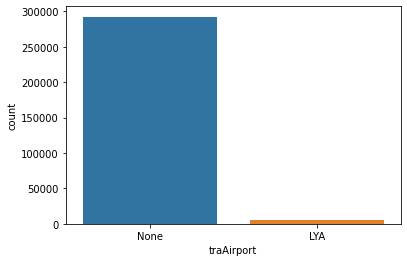

In [32]:
sns.countplot(data=df,x="traAirport")

In [33]:
df["traAirport"].value_counts() #quite unbalanced

None    292382
LYA       5749
Name: traAirport, dtype: int64

In [34]:
df[df.traAirport == "LYA"].flightNumber.value_counts()
# Only 2 flights have a transit Airport


MU5693    3650
MU5390    2099
Name: flightNumber, dtype: int64

<AxesSubplot:xlabel='cabinClass', ylabel='count'>

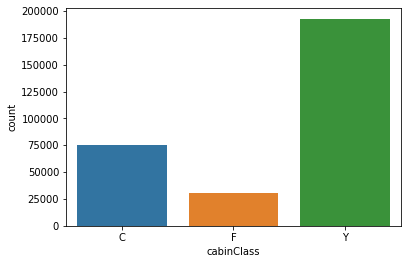

In [35]:
sns.countplot(data=df,x="cabinClass")

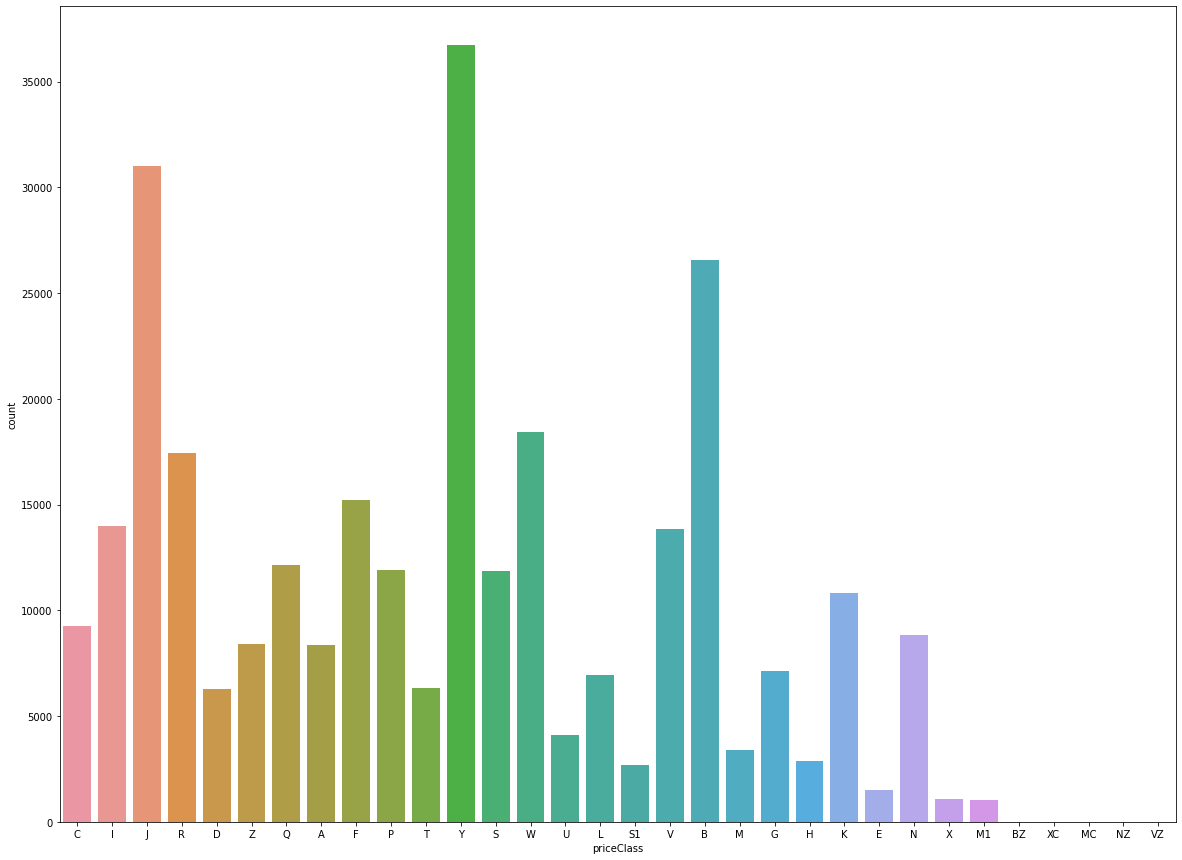

In [36]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=df,x="priceClass")
plt.show()

In [37]:
# are BZ, XC, MC, NZ, VZ empty ?
print(df['priceClass'].value_counts()['BZ'],df['priceClass'].value_counts()['XC'],df['priceClass'].value_counts()['MC'],df['priceClass'].value_counts()['NZ'],df['priceClass'].value_counts()['VZ'])

2 3 4 1 3


<AxesSubplot:xlabel='craftTypeCode', ylabel='count'>

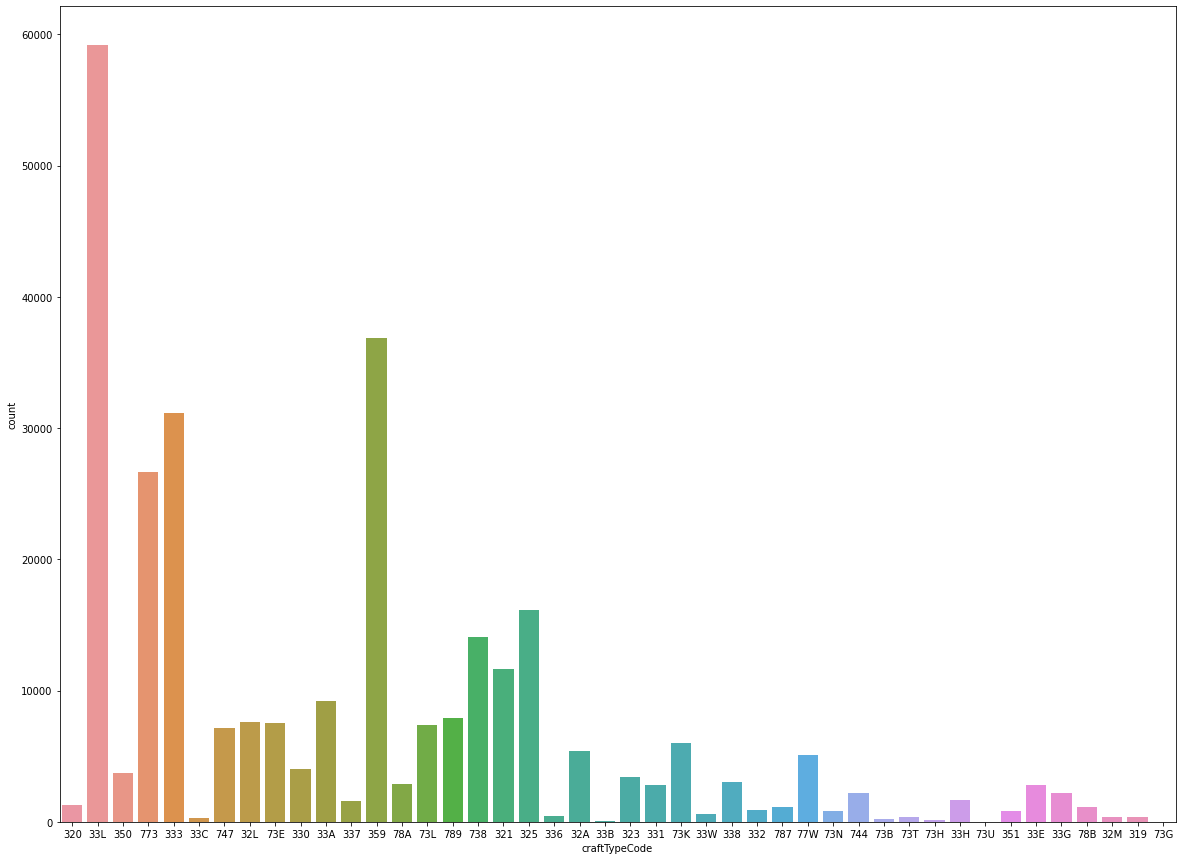

In [38]:
#NO, they are very less in number.
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(data=df,x='craftTypeCode')

<AxesSubplot:xlabel='flightNumber', ylabel='count'>

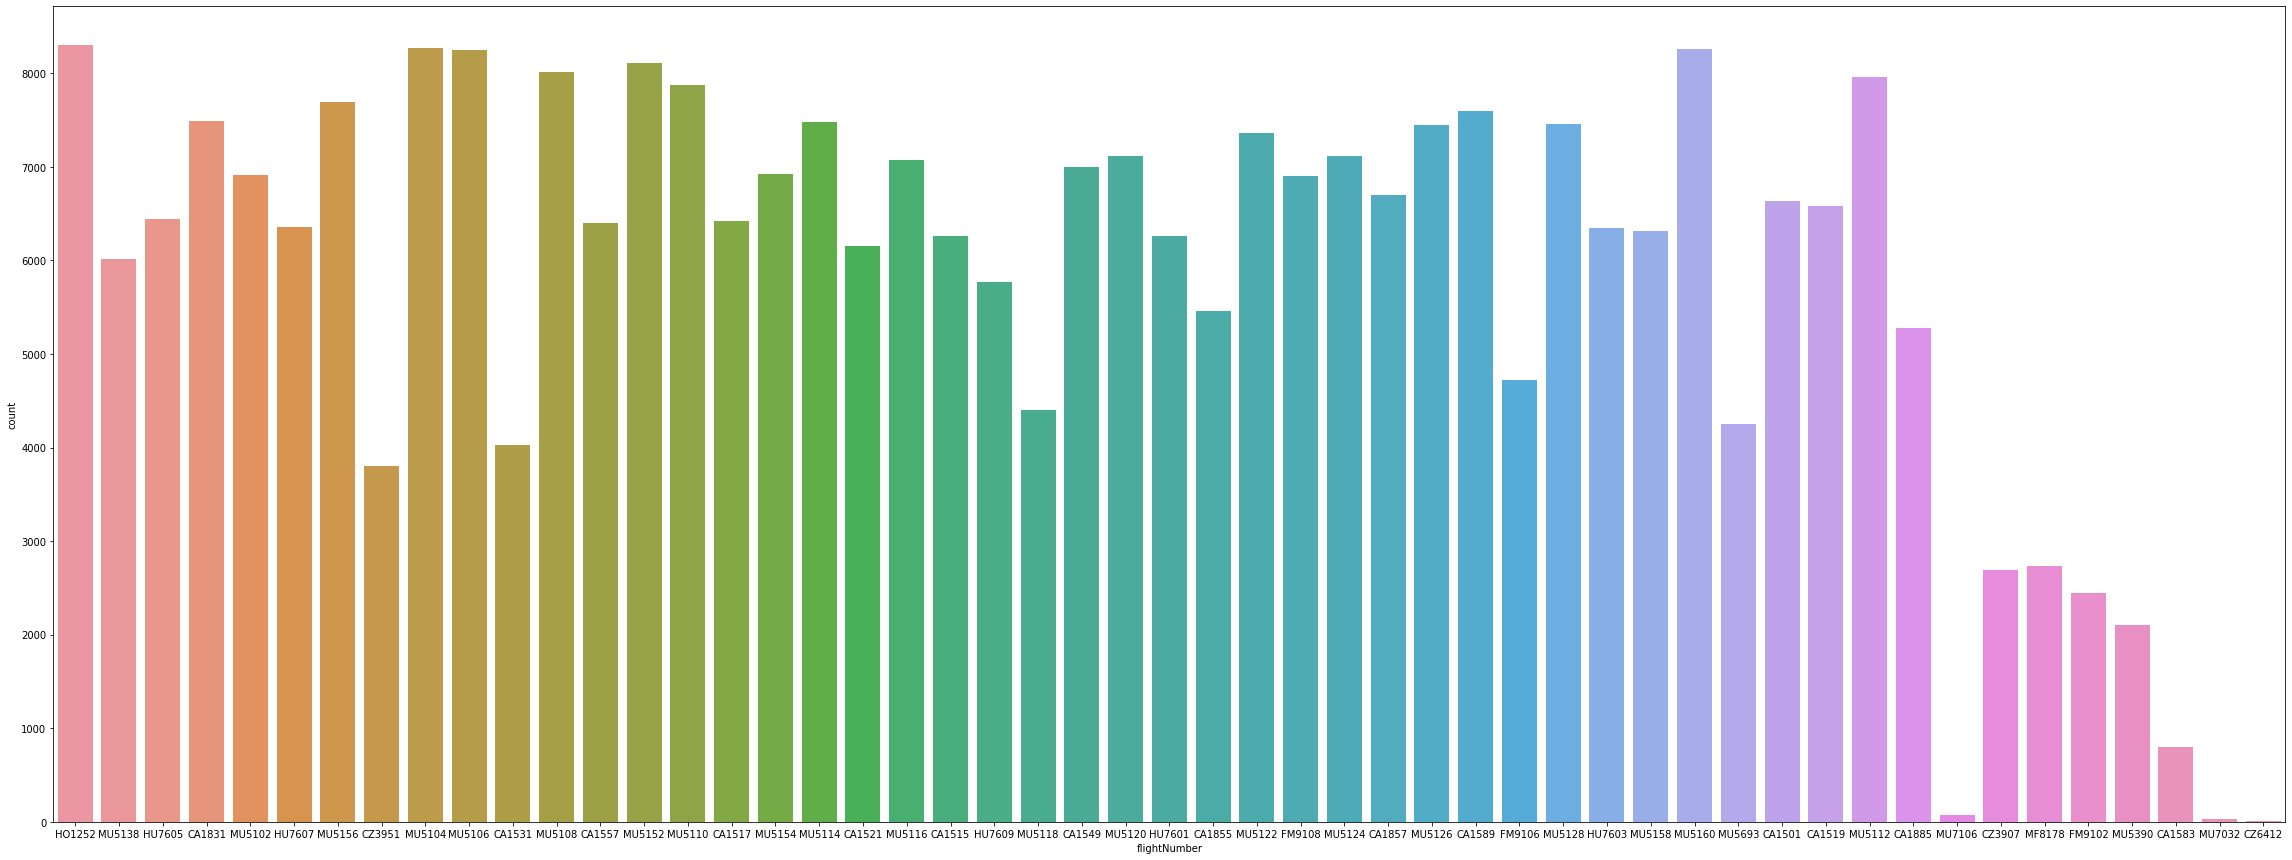

In [39]:
#33L is the most occuring aircraft code
fig, ax = plt.subplots(figsize=(40, 15))
sns.countplot(data=df,x='flightNumber')

In [40]:
df.corr()

,price,rate,dateDifference,daysaway,arrDay
price,1.000000,0.430178,-0.052950,-0.057445,0.025186
rate,0.430178,1.000000,-0.021908,-0.060896,0.060926
dateDifference,-0.052950,-0.021908,1.000000,0.007318,0.005487
daysaway,-0.057445,-0.060896,0.007318,1.000000,0.005867
arrDay,0.025186,0.060926,0.005487,0.005867,1.000000


In [41]:
df.corr().style.background_gradient(cmap='coolwarm')

,price,rate,dateDifference,daysaway,arrDay
price,1.000000,0.430178,-0.052950,-0.057445,0.025186
rate,0.430178,1.000000,-0.021908,-0.060896,0.060926
dateDifference,-0.052950,-0.021908,1.000000,0.007318,0.005487
daysaway,-0.057445,-0.060896,0.007318,1.000000,0.005867
arrDay,0.025186,0.060926,0.005487,0.005867,1.000000


In [42]:
#pretty bad, im still confused as to what rate & price means? is ||price=original_ticket_value*rate|| or ||original_ticket_value = price * rate||

<AxesSubplot:xlabel='Cabin Class', ylabel='Mean Price'>

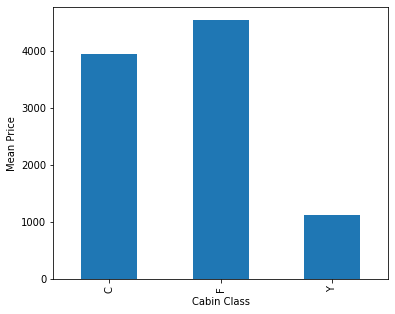

In [43]:
dfg = df.groupby("cabinClass").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Cabin Class', figsize=(6, 5))

<AxesSubplot:xlabel='Price Class', ylabel='Mean Price'>

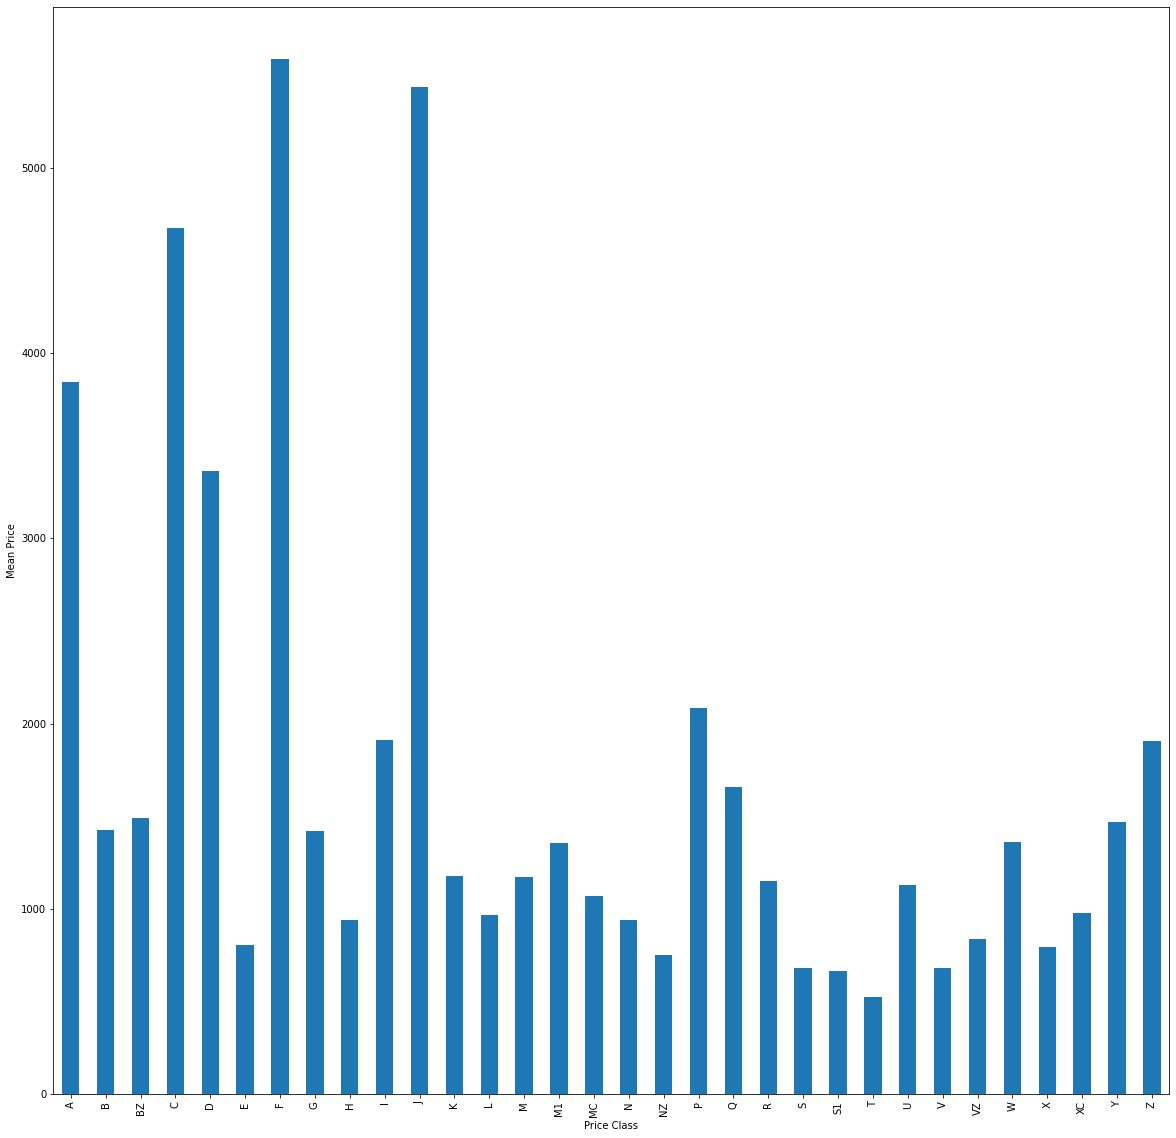

In [44]:
dfg = df.groupby("priceClass").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Price Class', figsize=(20, 20))

<AxesSubplot:xlabel='Craft Type', ylabel='Mean Price'>

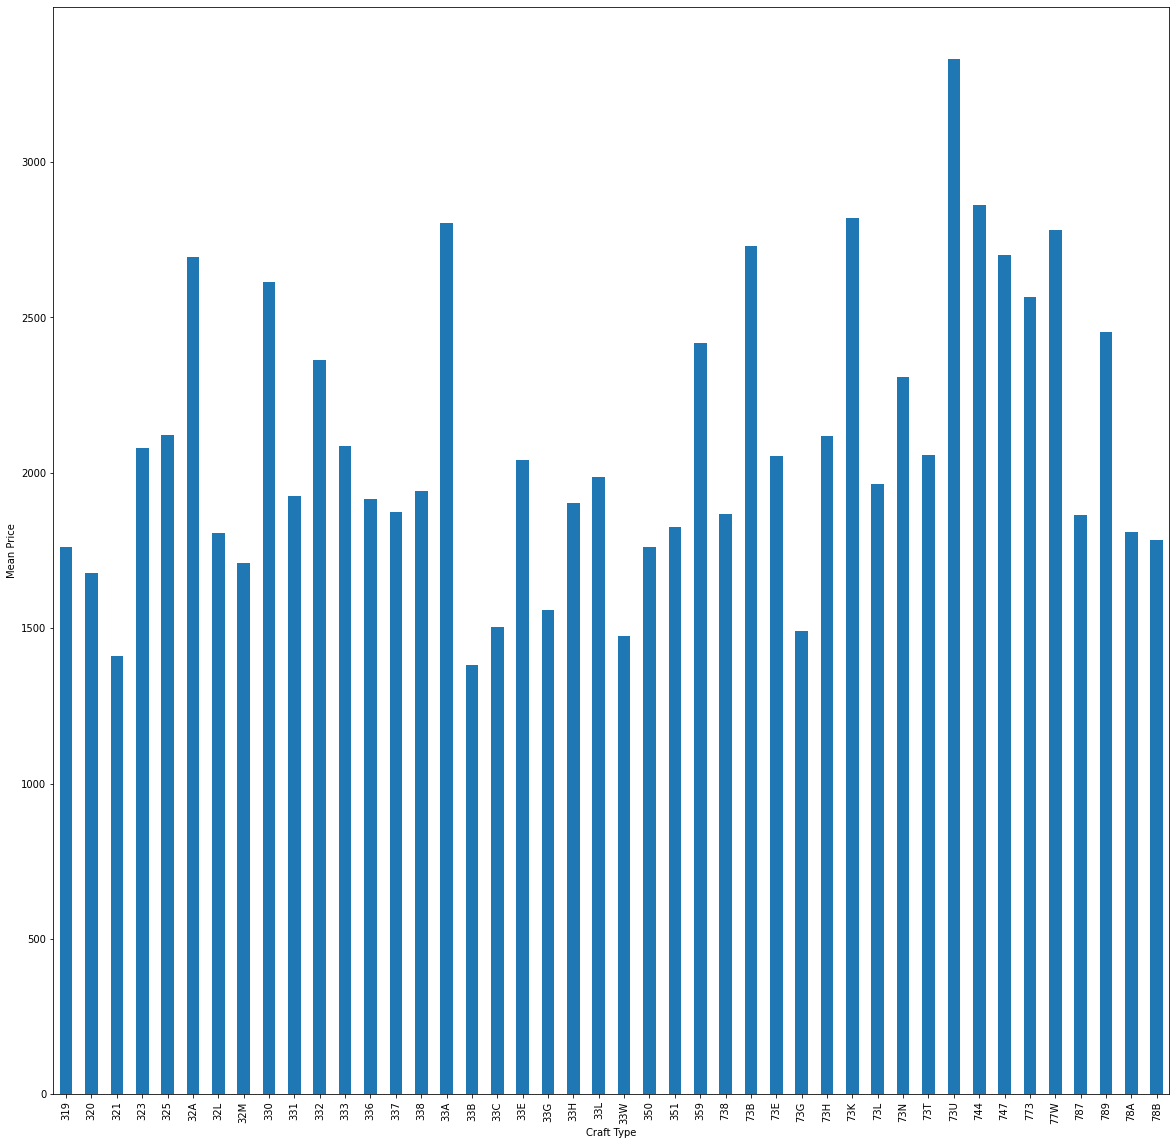

In [45]:
dfg = df.groupby("craftTypeCode").price.mean()
dfg.plot(kind='bar', ylabel='Mean Price',
         xlabel='Craft Type', figsize=(20, 20))

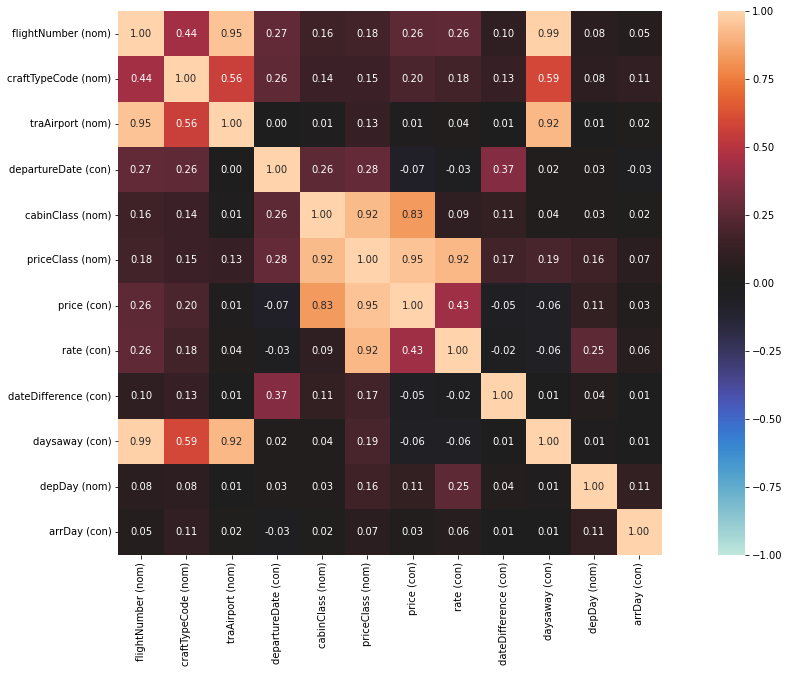

In [46]:
from dython import nominal
# the called method uses * Pearson's R for continuous-continuous cases * Correlation Ratio for categorical-continuous cases * Cramer's V or Theil's U for categorical-categorical cases
nominal.associations(df,figsize=(20,10),mark_columns=True);

In [47]:
# most correlated attributes are cabinClass, priceClass, rate 
df1 = df[['cabinClass', 'priceClass']]

In [48]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
df1_ohedone = pd.DataFrame(ohe.fit_transform(df1).toarray())

In [49]:
ohe.categories_

[array(['C', 'F', 'Y'], dtype=object),
 array(['A', 'B', 'BZ', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L',
        'M', 'M1', 'MC', 'N', 'NZ', 'P', 'Q', 'R', 'S', 'S1', 'T', 'U',
        'V', 'VZ', 'W', 'X', 'XC', 'Y', 'Z'], dtype=object)]

In [50]:
df = df.join(df1_ohedone)

In [51]:
df.head(10)

,flightNumber,craftTypeCode,traAirport,departureDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,...,25,26,27,28,29,30,31,32,33,34
0,HO1252,320,None,2019-01-04 06:35:00,C,C,1860,1.00,1,8400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MU5138,33L,None,2019-01-04 07:00:00,C,I,1640,0.31,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MU5138,33L,None,2019-01-04 07:00:00,C,J,5360,1.00,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HU7605,350,None,2019-01-04 07:20:00,C,I,1635,0.29,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HU7605,350,None,2019-01-04 07:20:00,C,I,1640,0.29,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,HU7605,350,None,2019-01-04 07:20:00,C,C,5660,1.00,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,CA1831,773,None,2019-01-04 07:30:00,C,R,1860,0.34,1,7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,CA1831,773,None,2019-01-04 07:30:00,C,J,5530,1.00,1,7500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,MU5102,333,None,2019-01-04 08:00:00,C,I,1800,0.34,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,MU5102,333,None,2019-01-04 08:00:00,C,J,5360,1.00,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df2 = df.copy()

In [53]:
df2.head()

,flightNumber,craftTypeCode,traAirport,departureDate,cabinClass,priceClass,price,rate,dateDifference,daysaway,...,25,26,27,28,29,30,31,32,33,34
0,HO1252,320,None,2019-01-04 06:35:00,C,C,1860,1.00,1,8400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,MU5138,33L,None,2019-01-04 07:00:00,C,I,1640,0.31,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MU5138,33L,None,2019-01-04 07:00:00,C,J,5360,1.00,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,HU7605,350,None,2019-01-04 07:20:00,C,I,1635,0.29,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,HU7605,350,None,2019-01-04 07:20:00,C,I,1640,0.29,1,8100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
df2.dropna(inplace= True)

In [55]:
#cabinClass, priceClass, rate 
df2.drop(['flightNumber','craftTypeCode','traAirport','departureDate','dateDifference','daysaway','depDay','arrDay','cabinClass','priceClass'], axis = 1, inplace=True)

In [56]:
df2.head(10)

,price,rate,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,34
0,1860,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1640,0.31,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5360,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1635,0.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1640,0.29,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5660,1.00,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1860,0.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5530,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1800,0.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5360,1.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295926 entries, 0 to 298130
Data columns (total 37 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   price   295926 non-null  int64  
 1   rate    295926 non-null  float64
 2   0       295926 non-null  float64
 3   1       295926 non-null  float64
 4   2       295926 non-null  float64
 5   3       295926 non-null  float64
 6   4       295926 non-null  float64
 7   5       295926 non-null  float64
 8   6       295926 non-null  float64
 9   7       295926 non-null  float64
 10  8       295926 non-null  float64
 11  9       295926 non-null  float64
 12  10      295926 non-null  float64
 13  11      295926 non-null  float64
 14  12      295926 non-null  float64
 15  13      295926 non-null  float64
 16  14      295926 non-null  float64
 17  15      295926 non-null  float64
 18  16      295926 non-null  float64
 19  17      295926 non-null  float64
 20  18      295926 non-null  float64
 21  19      29

In [58]:
from sklearn.model_selection import train_test_split
x=df2.drop('price',axis=1)
y=df2['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=69)

In [84]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

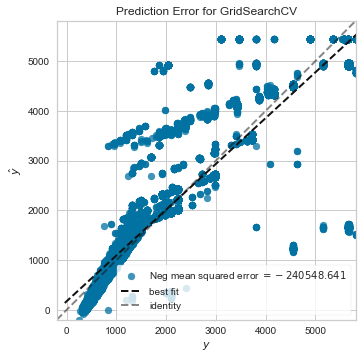

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [85]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
visualizer = PredictionError(ridge_regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

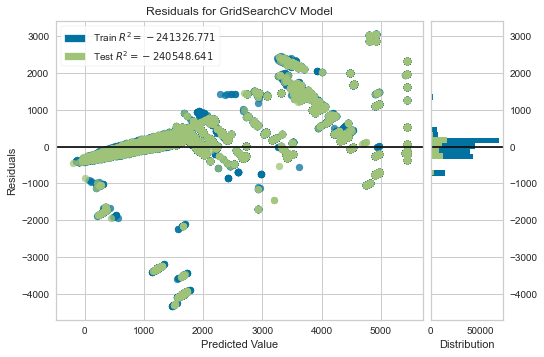

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [86]:
visualizer = ResidualsPlot(ridge_regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error
y_pred_train_ridge = ridge_regressor.predict(x_train)
y_pred_ridge = ridge_regressor.predict(x_test)
rmse_test_ridge = float(format(np.sqrt(mean_squared_error(y_test, y_pred_ridge)),'.3f'))
rmse_train_ridge = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)),'.3f'))
print("\nRMSE:\n",rmse_test_ridge,rmse_train_ridge)


RMSE:
 490.458 491.25


In [61]:
print(ridge_regressor.best_params_)

{'alpha': 1}


In [63]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)#used nmse cause obviously we are tuning, neg_errors work best for these

lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)

{'alpha': 0.01}


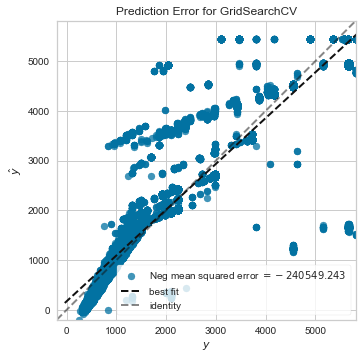

<AxesSubplot:title={'center':'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [87]:
visualizer = PredictionError(lasso_regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

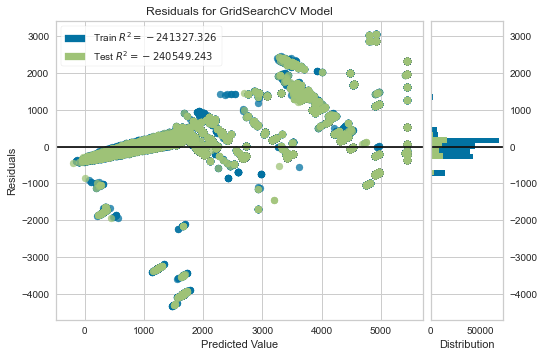

<AxesSubplot:title={'center':'Residuals for GridSearchCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [88]:
visualizer = ResidualsPlot(lasso_regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [64]:
y_pred_train_lasso = lasso_regressor.predict(x_train)
y_pred_lasso = lasso_regressor.predict(x_test)
rmse_test_lasso = float(format(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),'.3f'))
rmse_train_lasso = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)),'.3f'))
print("\nRMSE:\n",rmse_test_lasso,rmse_train_lasso)


RMSE:
 490.458 491.251


In [67]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,random_state=69)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=69)

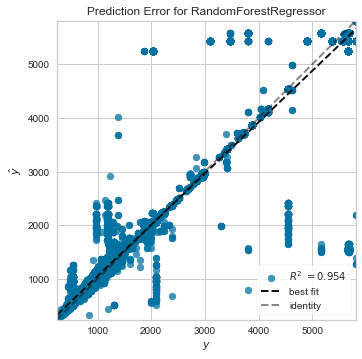

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [89]:
visualizer = PredictionError(model)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

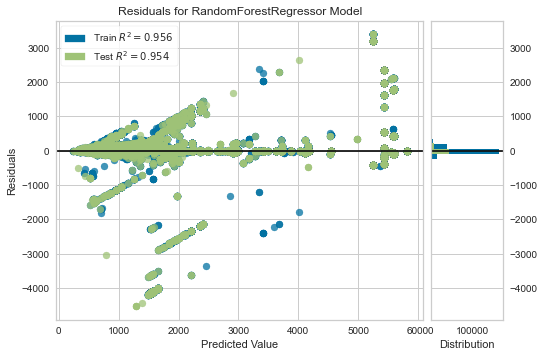

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [90]:
vizualizer = ResidualsPlot(model)
vizualizer.fit(x_train, y_train)
vizualizer.score(x_test, y_test)
vizualizer.poof()

In [68]:
y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.3f'))
print("\nRMSE:\n",rmse_test,rmse_train)


RMSE:
 369.035 362.416


In [69]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#measures the difference between the predicted & actual target and divided by the actual target values.

In [81]:
evaluate(lasso_regressor,x_test,y_test)
evaluate(ridge_regressor,x_test,y_test)
evaluate(model,x_test,y_test)

Model Performance
Average Error: 270.4514 degrees.
Accuracy = 84.06%.
Model Performance
Average Error: 270.4356 degrees.
Accuracy = 84.06%.
Model Performance
Average Error: 103.5922 degrees.
Accuracy = 95.39%.


95.39206092265692

In [72]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

NN_model_small = Sequential()
NN_model_small.add(Dense(units=10, input_dim=x_train.shape[1], activation='relu'))
NN_model_small.add(Dense(100,kernel_initializer='normal',activation='relu'))
NN_model_small.add(Dense(units=1, activation='linear'))
history_small = NN_model_small.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model_small.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                370       
                                                                 
 dense_4 (Dense)             (None, 100)               1100      
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,571
Trainable params: 1,571
Non-trainable params: 0
_________________________________________________________________


In [74]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_model_small.fit(x_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100


2022-07-11 19:40:43.669790: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 54544896 exceeds 10% of free system memory.


5902/5919 [============================>.] - ETA: 0s - loss: 446.9241 - mean_absolute_error: 446.9241
Epoch 1: val_loss improved from inf to 210.13586, saving model to Weights-001--210.13586.hdf5
5919/5919 [==============================] - 11s 2ms/step - loss: 446.2393 - mean_absolute_error: 446.2393 - val_loss: 210.1359 - val_mean_absolute_error: 210.1359
Epoch 2/100
5892/5919 [============================>.] - ETA: 0s - loss: 204.4385 - mean_absolute_error: 204.4385
Epoch 2: val_loss improved from 210.13586 to 201.15076, saving model to Weights-002--201.15076.hdf5
5919/5919 [==============================] - 10s 2ms/step - loss: 204.2850 - mean_absolute_error: 204.2850 - val_loss: 201.1508 - val_mean_absolute_error: 201.1508
Epoch 3/100
5889/5919 [============================>.] - ETA: 0s - loss: 200.3169 - mean_absolute_error: 200.3169
Epoch 3: val_loss improved from 201.15076 to 200.45218, saving model to Weights-003--200.45218.hdf5
5919/5919 [==============================] - 10s

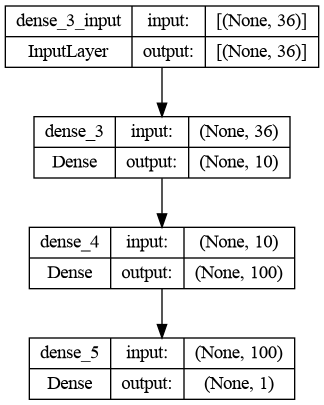

In [80]:
from keras.utils import plot_model
plot_model(NN_model_small, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [99]:
y_pred_train = NN_model_small.predict(x_train)
y_pred = NN_model_small.predict(x_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.3f'))
print("\nRMSE:\n",rmse_test,rmse_train)

  26/7399 [..............................] - ETA: 14s  

2022-07-12 19:48:36.822306: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 68181120 exceeds 10% of free system memory.


1850/1850 [==============================] - 3s 1ms/step

RMSE:
 406.301 401.184


1850/1850 [==============================] - 2s 1ms/step


ValueError: x and y must have same first dimension, but have shapes (3000,) and (59186, 1)

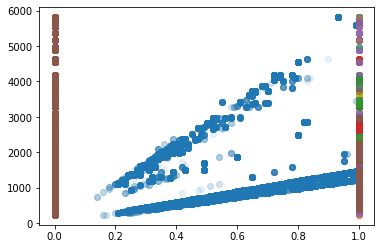

In [79]:
import tensorflow as tf

grid = tf.linspace(-4, 4, 3000)
fig, ax = plt.subplots()
ax.plot(x_train, y_train, 'o', alpha=0.1)
ax.plot(grid, NN_model_small.predict(x_test).reshape(-1, 1), color='k')

In [97]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

#The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               4736      
                                                                 
 dense_7 (Dense)             (None, 256)               33024     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 256)               65792     
                                                                 
 dense_10 (Dense)            (None, 1)                 257       
                                                                 
Total params: 169,601
Trainable params: 169,601
Non-trainable params: 0
_________________________________________________________________


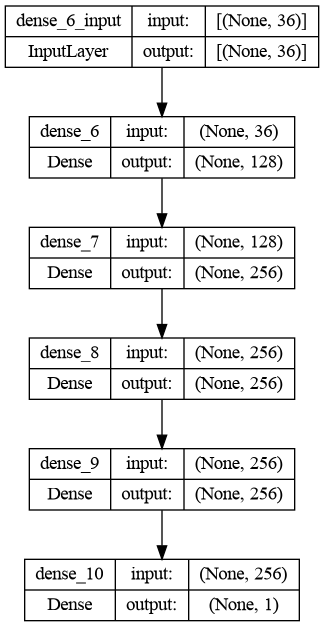

In [98]:
plot_model(NN_model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

In [ ]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/500
5919/5919 [==============================] - ETA: 0s - loss: 144.4979 - mean_absolute_error: 144.4979
Epoch 1: val_loss improved from inf to 95.83872, saving model to Weights-001--95.83872.hdf5
5919/5919 [==============================] - 27s 4ms/step - loss: 144.4979 - mean_absolute_error: 144.4979 - val_loss: 95.8387 - val_mean_absolute_error: 95.8387
Epoch 2/500
5917/5919 [============================>.] - ETA: 0s - loss: 99.0994 - mean_absolute_error: 99.0994
Epoch 2: val_loss did not improve from 95.83872
5919/5919 [==============================] - 25s 4ms/step - loss: 99.1059 - mean_absolute_error: 99.1059 - val_loss: 98.5310 - val_mean_absolute_error: 98.5310
Epoch 3/500
5912/5919 [============================>.] - ETA: 0s - loss: 98.6090 - mean_absolute_error: 98.6090
Epoch 3: val_loss did not improve from 95.83872
5919/5919 [==============================] - 25s 4ms/step - loss: 98.5762 - mean_absolute_error: 98.5762 - val_loss: 114.1213 - val_mean_absolute_error:

In [ ]:
y_pred_train = NN_model.predict(x_train)
y_pred = NN_model.predict(x_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.3f'))
print("\nRMSE:\n",rmse_test,rmse_train)

1850/1850 [==============================] - 3s 2ms/step

RMSE:
 388.973 384.338


In [92]:
from sklearn.linear_model import BayesianRidge
br_reg = BayesianRidge()
br_reg.fit(x_train,y_train)

BayesianRidge()

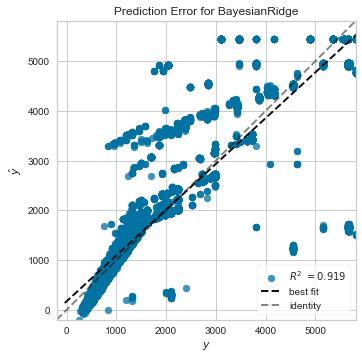

<AxesSubplot:title={'center':'Prediction Error for BayesianRidge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [93]:
visualizer = PredictionError(br_reg)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

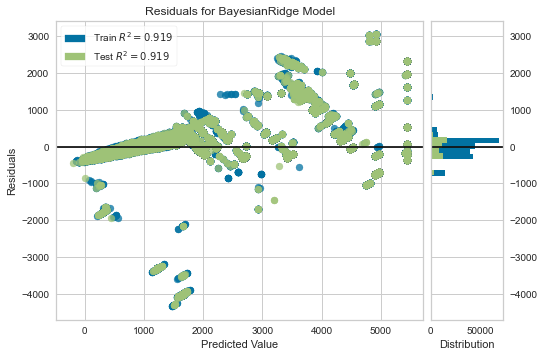

<AxesSubplot:title={'center':'Residuals for BayesianRidge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [94]:
visualizer = ResidualsPlot(br_reg)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [ ]:
br_reg.predict(x_test)

array([1668.20495034, 1679.94492734,  913.64922033, ..., 1282.17224146,
        473.76584417, 1836.95624818])

In [ ]:
br_reg.coef_

array([ 2.14911786e+03,  1.79137805e+02,  1.58422799e+03, -1.76336580e+03,
       -2.06966485e+02, -9.64991490e+01, -3.59451467e+01,  1.20811300e+03,
        4.63318397e+02, -1.17801277e+02, -1.73995862e+02, -1.05291009e+02,
       -1.45517075e+02, -4.08851312e+02,  1.73110503e+03, -1.37393040e+02,
       -1.22026370e+02, -1.03060886e+02, -1.19399700e+02, -1.78063514e+02,
       -1.16492327e+02,  2.76553693e-10, -1.45549124e+02, -3.52070971e+01,
       -1.81655358e+02, -1.12378682e+02, -1.05109365e+02, -6.32679934e+01,
       -1.20354808e+02, -1.21063182e+02,  2.35545128e+00, -1.03861844e+02,
       -1.06205028e+02, -1.42506556e+02, -1.08923435e+02,  8.49374765e+00])

In [ ]:
y_pred_train = br_reg.predict(x_train)
y_pred = br_reg.predict(x_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.3f'))
print("\nRMSE:\n",rmse_test,rmse_train)


RMSE:
 490.458 491.25


In [95]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)

SGDRegressor()

In [96]:
y_pred_train = sgd.predict(x_train)
y_pred = sgd.predict(x_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)),'.3f'))
rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)),'.3f'))
print("\nRMSE:\n",rmse_test,rmse_train)


RMSE:
 490.436 491.278


In [105]:
dict_error_train = {
    'Ridge': 491.25,
    'Lasso': 491.251,
    'Random forest': 362.416,
    'Bayesian Ridge': 491.25,
    'SGD': 491.278,
    'ANN one': 401.184,
    'ANN two': 384.338,
}

In [102]:
dict_error_test = {
    'Ridge': 490.458,
    'Lasso': 490.458,
    'Random forest': 369.035,
    'Bayesian Ridge': 490.458,
    'SGD': 490.436,
    'ANN one': 406.301,
    'ANN two': 388.973,
}

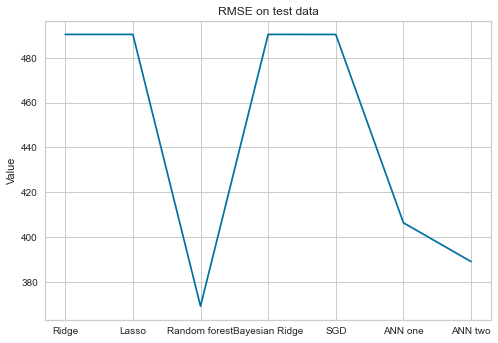

In [112]:
myList = dict_error_test.items()
# myList = sorted(myList)
x, y = zip(*myList)

plt.plot(x, y)
#plt.xlabel('Key')
plt.ylabel('Value')
plt.title('RMSE on test data')
plt.show()

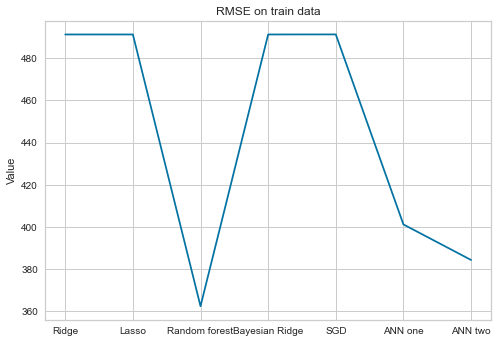

In [111]:
myList = dict_error_train.items()
# myList = sorted(myList)
x, y = zip(*myList)

plt.plot(x, y)
# plt.xlabel('Key')
plt.ylabel('Value')
plt.title('RMSE on train data')
plt.show()

In [ ]:
# price avg was 2209.684696, so our rmse is 369.035, lets tune hyper parameters, on top of it rmse of both training and testing dont vary much so nothing about the fitting of the model can be said
#RMSE of test > RMSE of train => OVER FITTING of the data.
#RMSE of test < RMSE of train => UNDER FITTING of the data.

In [ ]:
# print('Parameters currently in use:\n')
# print(model.get_params())

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

In [ ]:
# rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# rf_random.fit(x_train, y_train)